<a href="https://colab.research.google.com/github/Riyago/Hotel-Booking-Analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
working_dir_path= "/content/drive/MyDrive/Capstone/"
HotelBooking_df= pd.read_csv(working_dir_path+'Hotel Bookings.csv')

In [4]:
#Show bottom rows
HotelBooking_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
HotelBooking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
HotelBooking_df[HotelBooking_df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [7]:
HotelBooking_df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

# **Data Description:**

1.hotel : Hotel(Resort Hotel or City Hotel)

2.is_canceled : Value indicating if the booking was canceled (1) or not (0)

3.lead_time :* Number of days that elapsed between the entering date of the   booking into the PMS and the arrival date*

4.arrival_date_year : Year of arrival date

5.arrival_date_month : Month of arrival date

6.arrival_date_day_of_month : Day of arrival date

7.arrival_date_week_number : Week number of year for arrival date

8.stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

9.stays_in_week_nights : Number of week nights (Monday to Friday) the guest   stayed or booked to stay at the hotel

10.children : Number of children

11.adults : Number of adults

12.babies : Number of babies

13.meal : Type of meal booked. Categories are presented in standard hospitality meal packages:

14.market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”`

15.country : Country of origin.`

16.distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

17.is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)

18.reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

19.previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

20.previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking

21.choosen_room_type : Code for the type of room assigned to the booking.

22.booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

23.deposit_type : Indication on if the customer made a deposit to guarantee the booking.

24.agent : ID of the travel agency that made the booking

25.company : ID of the company/entity that made the booking or responsible for paying the booking.

26.days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer

27.customer_type : Type of booking, assuming one of four categories

28.adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

29.required_car_parking_spaces : Number of car parking spaces required by the customer

30.total_of_special_requests :* Number of special requests made by the customer (e.g. twin bed )*

31.reservation_status_date : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

32.reservation_status : Reservation last status, assuming one of three categories

Canceled – booking was canceled by the customer
Check-Out – customer has checked in but already departed
No-Information – customer did not check-in and did inform the hotel of the reason why

## **Data** **Cleaning** 

In [9]:
HotelBooking_df.drop(['company','country'],inplace=True,axis=1)

In [8]:
HotelBooking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
HotelBooking_df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0
customer_type                         0


In [11]:
HotelBooking_df['children'].median()

0.0

In [12]:
  HotelBooking_df['children'].fillna(HotelBooking_df['children'].median(),inplace=True)

In [13]:
HotelBooking_df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0
customer_type                         0


# **Problem 1**

# When the best time of year to book a hotel room is?

In [30]:
#import metplotlib inline
%matplotlib inline

In [31]:
Hotelbooking_year1= HotelBooking_df.groupby(['arrival_date_year','arrival_date_month'])['arrival_date_year'].count().unstack()


In [32]:
#selected Years of hotel booking
Hotelbooking_year1

arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
arrival_date_year,,,,,,,,,,,,
2015,NaN,3889.0,2920.0,NaN,NaN,2776.0,NaN,NaN,NaN,2340.0,4957.0,5114.0
2016,5428.0,5063.0,3860.0,3891.0,2248.0,4572.0,5292.0,4824.0,5478.0,4454.0,6203.0,5394.0
2017,5661.0,4925.0,NaN,4177.0,3681.0,5313.0,5647.0,4970.0,6313.0,NaN,NaN,NaN


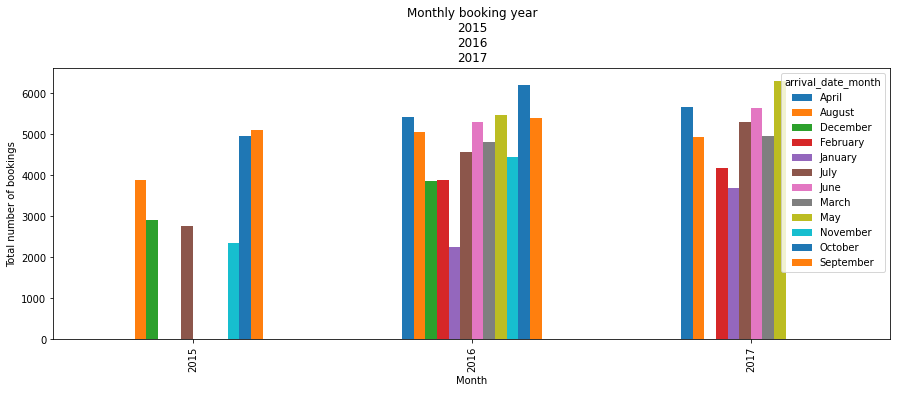

In [33]:
#Graphical Presentation of monthly booking in selected years
Hotelbooking_year1.plot(kind='bar',figsize=(15,5))

plt.title('Monthly booking year\n2015\n2016\n2017')
plt.ylabel('Total number of bookings')
plt.xlabel('Month')
plt.show()

# Obervation

This bar graph is showing total number of bookings yearly in each month so here we get on conclusion that In 2015 highest number of bookings are done in september month,In 2016 highest number of bookings are done in october month and In 2017 highest number of bookings are done in May.

In [34]:
#Monthly engagement of hotel boooking
monthly_engagement=HotelBooking_df['arrival_date_month'].value_counts()

In [35]:
type(monthly_engagement)

pandas.core.series.Series

In [36]:
monthly_engagement.sort_index(inplace=True)

In [37]:
monthly_engagement

April        11089
August       13877
December      6780
February      8068
January       5929
July         12661
June         10939
March         9794
May          11791
November      6794
October      11160
September    10508
Name: arrival_date_month, dtype: int64

In [38]:
monthly_engagement.shape

(12,)

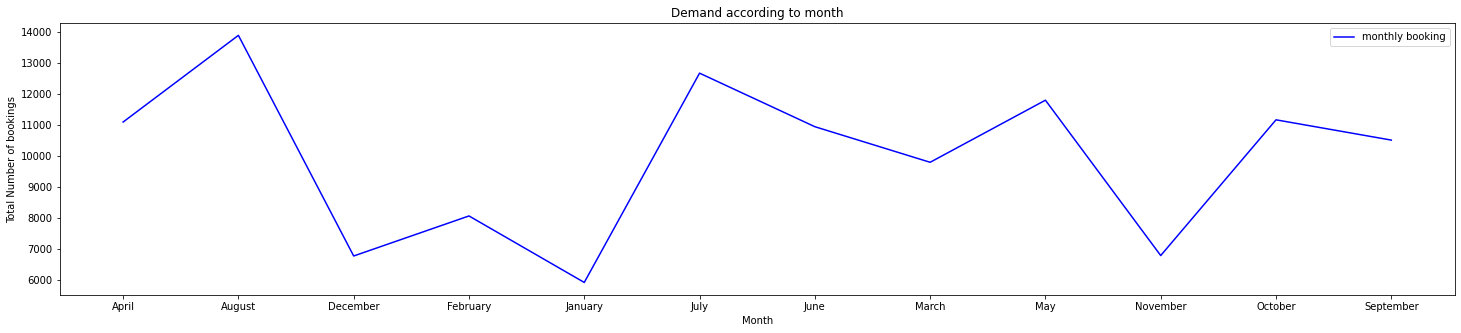

In [39]:
#Graphical representation of Monthly changes in demand of hotel booking 
plt.figure(figsize=(25,5))
plt.plot(monthly_engagement,
         color='blue',
         linestyle='solid',
         label='monthly booking')
plt.title('Demand according to month')
plt.ylabel('Total Number of bookings')
plt.xlabel('Month')
plt.legend()        
plt.show()

# Observation

Here we have found avearge of total number of bookings in three year and conclude that august and july has the highest number of hotel bookings.

# **Problem 2**

# What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

In [40]:
according_to_month=HotelBooking_df['arrival_date_month'].value_counts()

In [41]:
type(according_to_month)

pandas.core.series.Series

In [42]:
according_to_month.sort_index(inplace=True)

In [43]:
according_to_month

April        11089
August       13877
December      6780
February      8068
January       5929
July         12661
June         10939
March         9794
May          11791
November      6794
October      11160
September    10508
Name: arrival_date_month, dtype: int64

Text(0.5, 1.0, 'special request according to month')

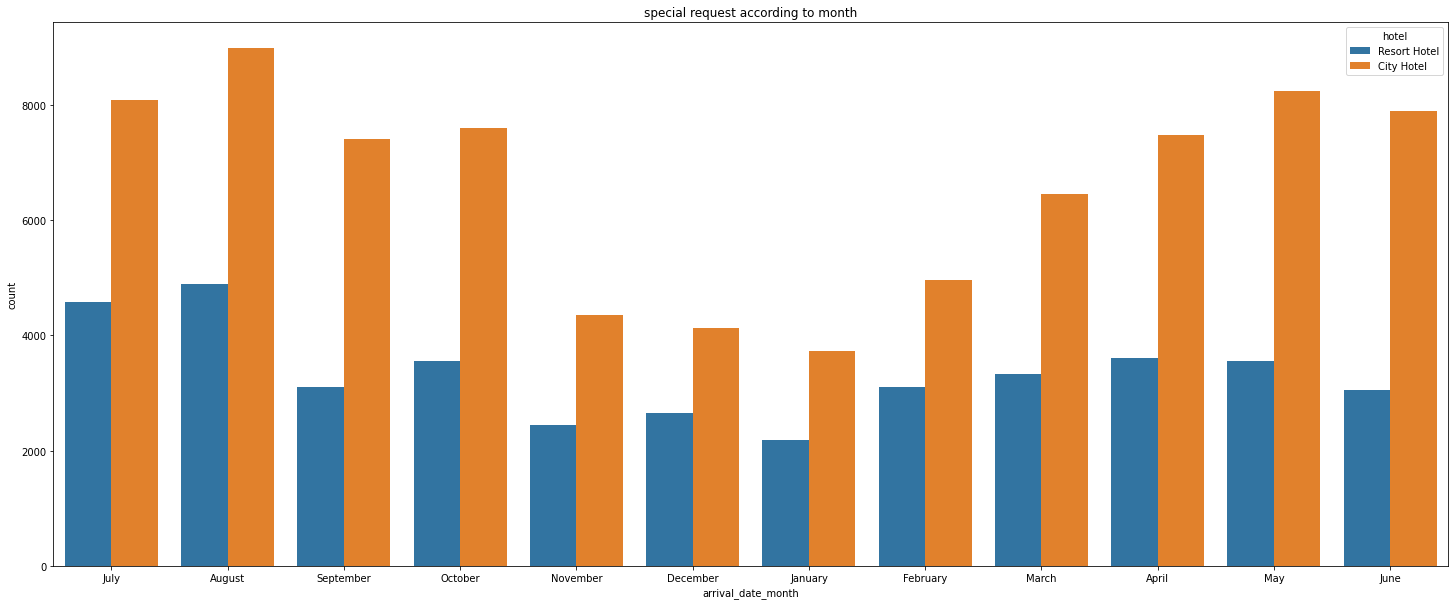

In [44]:
#Below graphical representation shows the monthwise special request in hotel

plt.figure(figsize=(25,10))

sns.countplot(x=HotelBooking_df['arrival_date_month'],hue=HotelBooking_df['hotel'])
plt.title('special request according to month')

# Observation

Highest Number of special request are done in August for both city hotels and resort hotels

# **Problem 3**

# Which days prefer customer stay in hotel?

In [45]:
#use function to crerate a new column
def total_stay(stays_in_weekend_nights,stays_in_week_nights):
  night_stay=0
  if stays_in_week_nights>0:
    night_stay=stays_in_weekend_nights+stays_in_week_nights

    return night_stay

In [46]:
HotelBooking_df['night_stay']=HotelBooking_df.apply(lambda x:total_stay(x['stays_in_weekend_nights'], x['stays_in_week_nights']),axis=1)

In [47]:
HotelBooking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,night_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,NaN
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,NaN
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0


Text(0, 0.5, 'count')

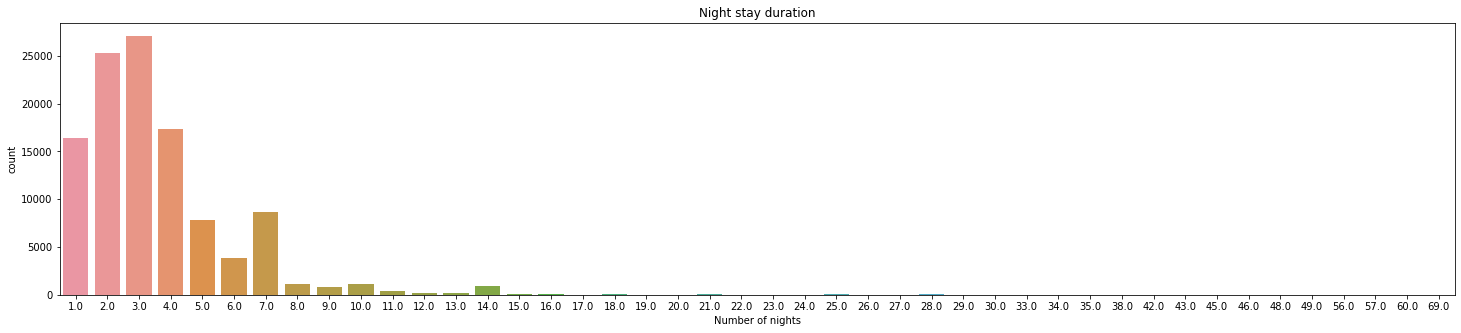

In [48]:
plt.figure(figsize=(25,5))
sns.countplot(x=HotelBooking_df['night_stay'])
plt.title('Night stay duration')
plt.xlabel('Number of nights')
plt.ylabel('count')

In [49]:
from locale import normalize
HotelBooking_df['night_stay'].value_counts(normalize=True)

3.0     0.242302
2.0     0.226247
4.0     0.155560
1.0     0.147219
7.0     0.077453
5.0     0.069659
6.0     0.034516
8.0     0.010390
10.0    0.010193
14.0    0.008197
9.0     0.007526
11.0    0.003544
12.0    0.001996
13.0    0.001271
15.0    0.000671
21.0    0.000635
16.0    0.000358
25.0    0.000331
18.0    0.000313
28.0    0.000313
19.0    0.000197
17.0    0.000179
22.0    0.000125
20.0    0.000125
29.0    0.000125
30.0    0.000116
23.0    0.000072
26.0    0.000054
24.0    0.000054
27.0    0.000045
35.0    0.000045
42.0    0.000036
33.0    0.000027
56.0    0.000018
46.0    0.000009
60.0    0.000009
69.0    0.000009
45.0    0.000009
38.0    0.000009
48.0    0.000009
49.0    0.000009
57.0    0.000009
34.0    0.000009
43.0    0.000009
Name: night_stay, dtype: float64

# Obervation

Three days night stay in hotel is mostly preferred 

# **Problem 4**

# What is the percentage of cancellation in city hotel and resort hotel?

Text(0, 0.5, 'Reservation count')

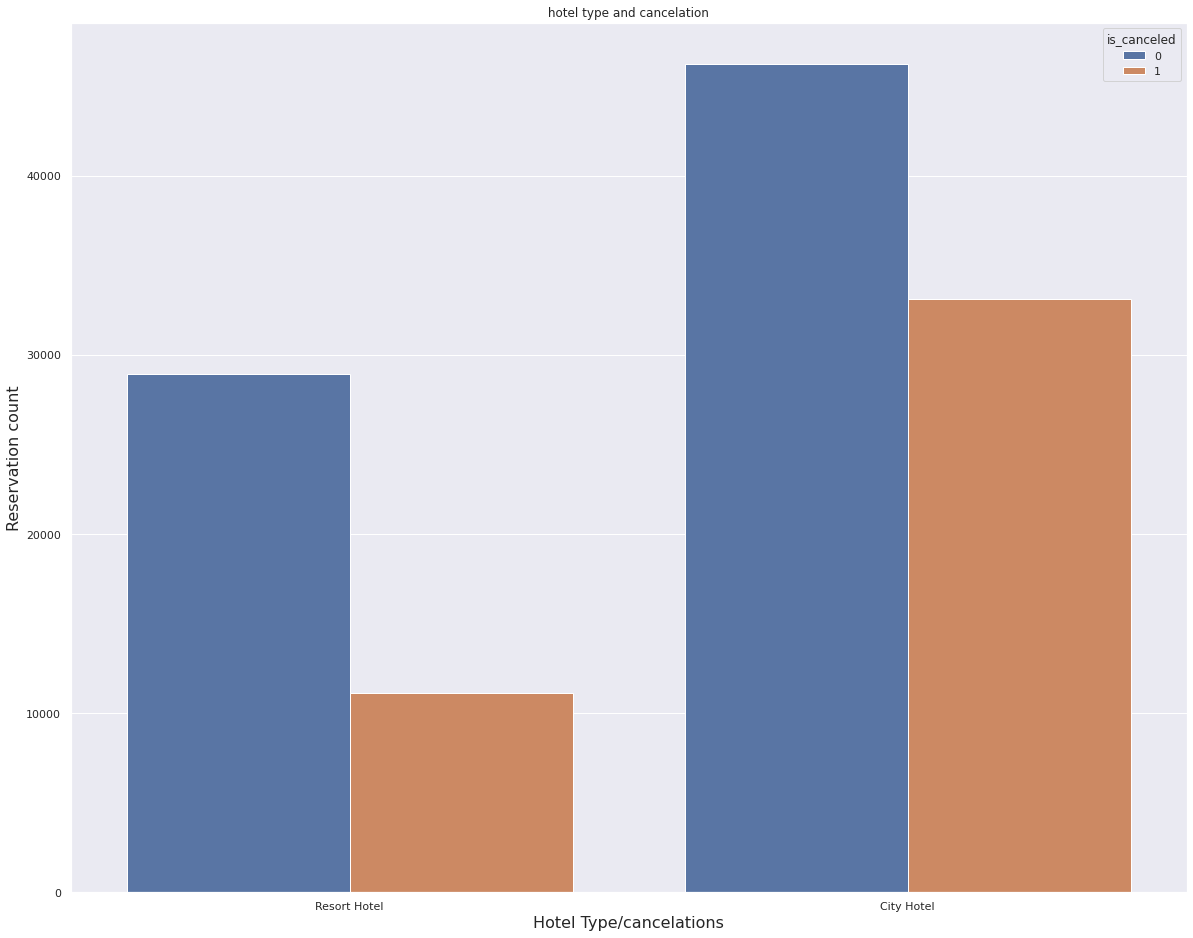

In [50]:
#use countplot
sns.set(rc={'figure.figsize':(20,16)})
graph=sns.countplot(x='hotel',hue='is_canceled',data=HotelBooking_df)
graph.set(title=' hotel type and cancelation ')
graph.set_xlabel('Hotel Type/cancelations',fontsize=16)
graph.set_ylabel('Reservation count',fontsize=16)

In [80]:
from locale import normalize
HotelBooking_df['is_canceled'].value_counts(normalize=True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

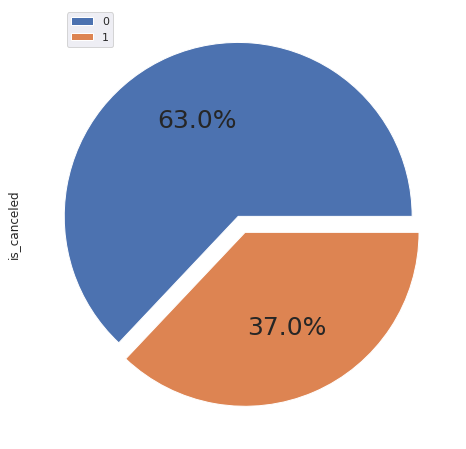

In [87]:
HotelBooking_df['is_canceled'].value_counts().plot.pie(explode=(0.05,0.05),autopct='%1.1f%%',shadow=False,figsize=(14,8),fontsize=25,labels=None)
labels=HotelBooking_df['is_canceled'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.085,1),loc='upper left',labels=labels)

# Observation

Observed that 37% customer were cancelling booking of city or resort hotels.

# **Problem 5**

# What type of meal is needed in hotel?

Text(0, 0.5, 'count')

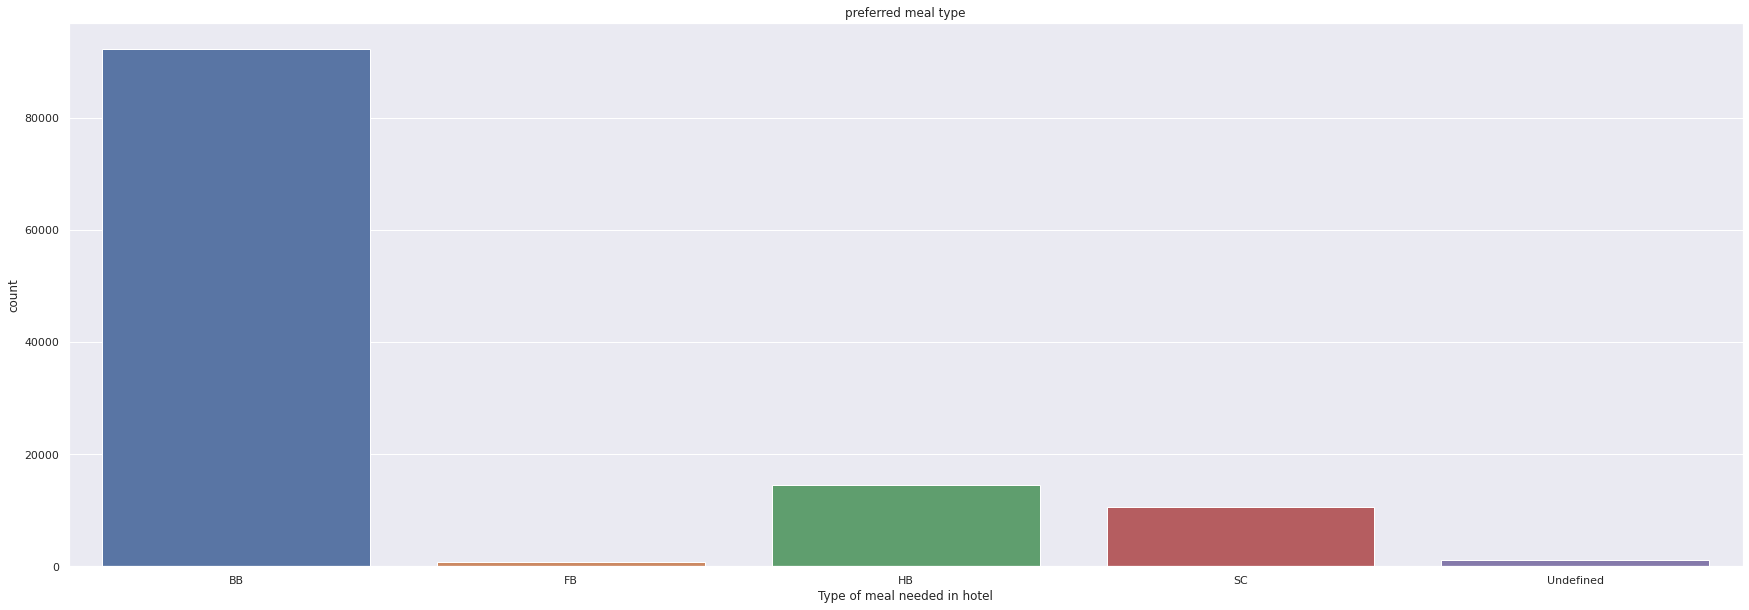

In [52]:
#use countplot
plt.figure(figsize=(30,10))
sns.countplot(x=HotelBooking_df['meal'])
plt.title('preferred meal type')
plt.xlabel('Type of meal needed in hotel')
plt.ylabel('count')

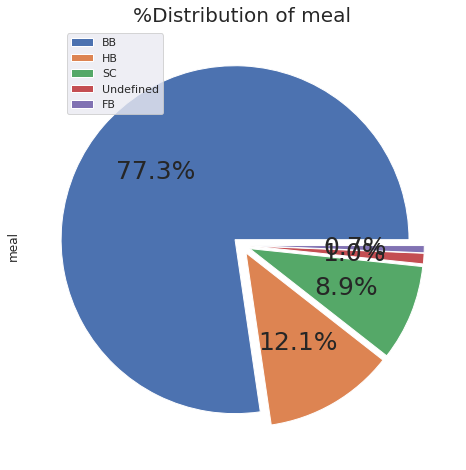

In [77]:
HotelBooking_df['meal'].value_counts().plot.pie(explode=(0.05,0.05,0.05,0.05,0.05),autopct='%1.1f%%',shadow=False,figsize=(14,8),fontsize=25,labels=None)
plt.title("%Distribution of meal",fontsize=20)
labels=HotelBooking_df['meal'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.085,1),loc='upper left',labels=labels)

# **Observation**

Highly preferable meal type is BB which is required 77.3% and second most is HB which is required 12.1%

# **Problem 6**

# What is the customer reservation status?

# below countplot show the reserved status in hotel?





Text(0, 0.5, 'Reservation_count')

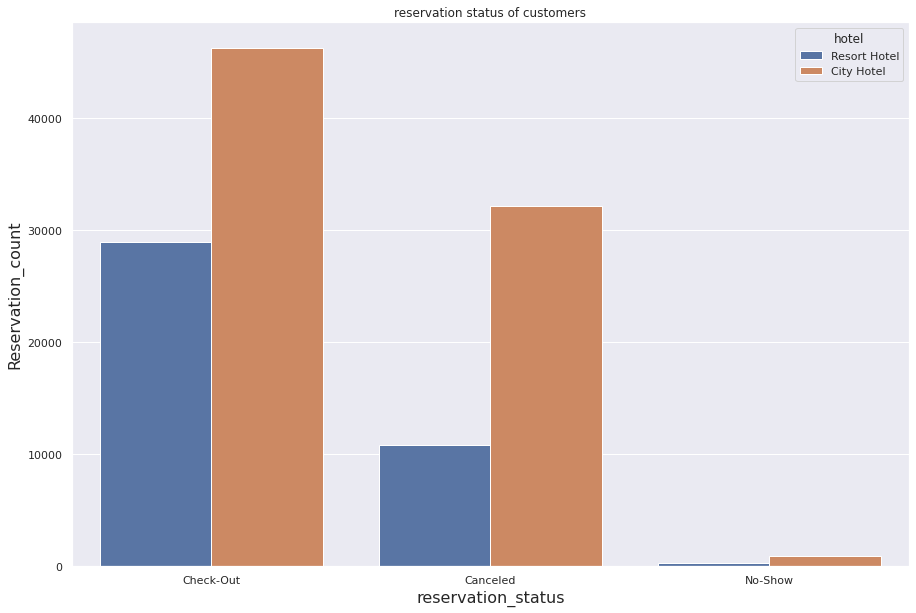

In [53]:
 sns.set(rc={'figure.figsize':(15,10)})
graph=sns.countplot(x='reservation_status',hue='hotel',data=HotelBooking_df)
graph.set(title='reservation status of customers')
graph.set_xlabel("reservation_status",fontsize=16)
graph.set_ylabel("Reservation_count",fontsize=16)

# Observation

Resort hotels are reserved by more then 20000 customers and city hotels are reserved by more then 40000 and customers who cancelled after reserving in resort hotels are more then 10000 and in city hotels are 30000.

# **Problem** **7**

# Highest number of days customer stay in hotel?

In [57]:
HotelBooking_df['total_stay']=HotelBooking_df['stays_in_weekend_nights']+HotelBooking_df['stays_in_week_nights']

Text(0, 0.5, 'count')

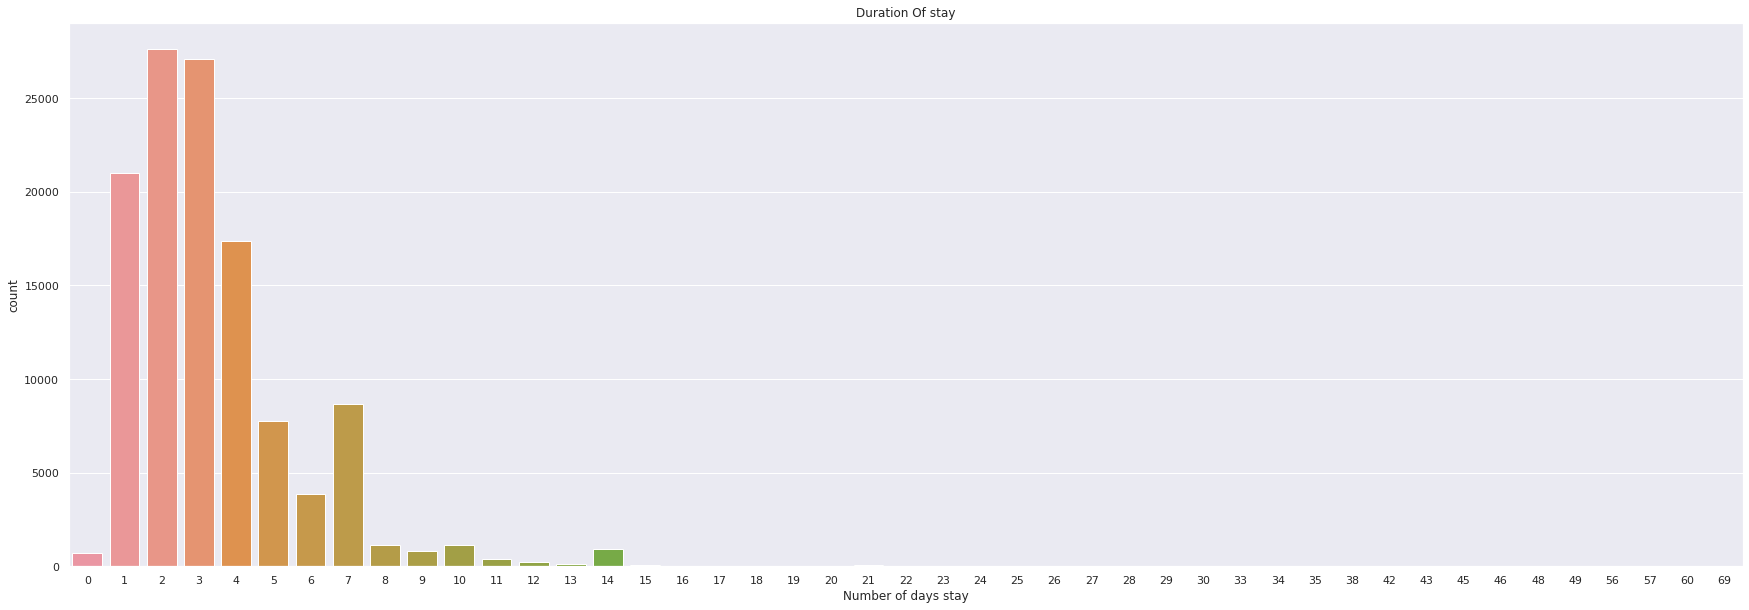

In [58]:
plt.figure(figsize=(30,10))
sns.countplot(x=HotelBooking_df['total_stay'])
plt.title('Duration Of stay')
plt.xlabel('Number of days stay')
plt.ylabel('count')

In [59]:
from locale import normalize
HotelBooking_df['total_stay'].value_counts(normalize=True)

2     0.231535
3     0.226786
1     0.176062
4     0.145598
7     0.072494
5     0.065198
6     0.032306
8     0.009724
10    0.009540
14    0.007672
9     0.007044
0     0.005989
11    0.003317
12    0.001868
13    0.001189
15    0.000628
21    0.000595
16    0.000335
25    0.000310
18    0.000293
28    0.000293
19    0.000184
17    0.000168
29    0.000117
20    0.000117
22    0.000117
30    0.000109
23    0.000067
24    0.000050
26    0.000050
27    0.000042
35    0.000042
42    0.000034
33    0.000025
56    0.000017
34    0.000008
57    0.000008
49    0.000008
48    0.000008
69    0.000008
38    0.000008
45    0.000008
60    0.000008
46    0.000008
43    0.000008
Name: total_stay, dtype: float64

# Observation

17% of customers prefer to stay one day,23% prefer to stay two day and 22% prefer to stay three day in hotel.

# **Problem 8**

What is the percentage distribution of required_car_parking_spaces?

Text(0, 0.5, 'count')

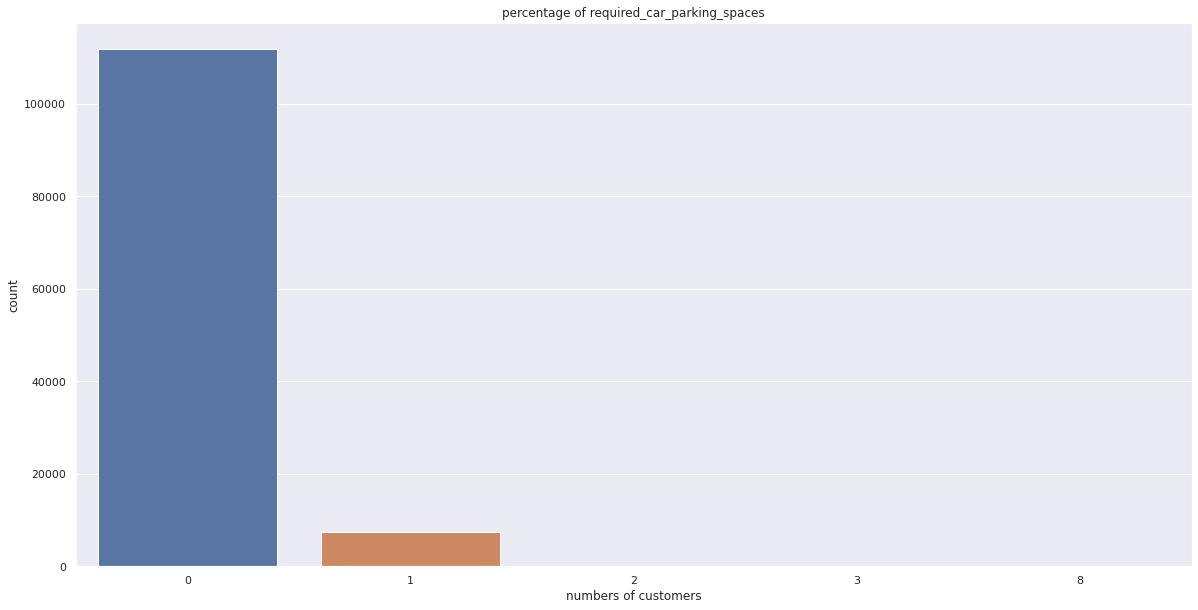

In [60]:
# required_car_parking_spaces distribution
plt.figure(figsize=(20,10))
sns.countplot(x=HotelBooking_df['required_car_parking_spaces'])
plt.title('percentage of required_car_parking_spaces')
plt.xlabel('numbers of customers')
plt.ylabel('count')

In [61]:
from locale import normalize
HotelBooking_df['required_car_parking_spaces'].value_counts(normalize=True)

0    0.937884
1    0.061839
2    0.000235
3    0.000025
8    0.000017
Name: required_car_parking_spaces, dtype: float64

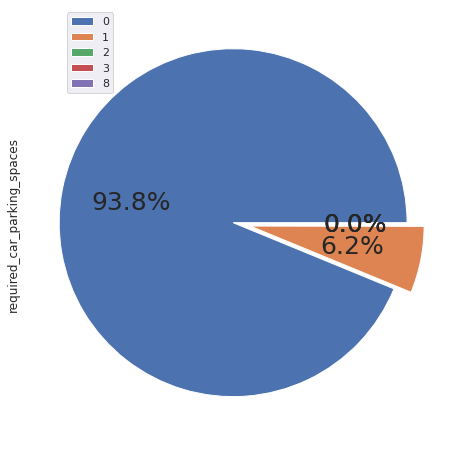

In [78]:
HotelBooking_df['required_car_parking_spaces'].value_counts().plot.pie(explode=(0.05,0.05,0.05,0.05,0.05),autopct='%1.1f%%',shadow=False,figsize=(14,8),fontsize=25,labels=None)
labels=HotelBooking_df['required_car_parking_spaces'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.085,1),loc='upper left',labels=labels)

# Observation

93% customers required car parking space

# Problem 9

Which distribution channel contribute more to adr in order to increase the income?

Text(0.5, 1.0, 'ADR across distribution channel')

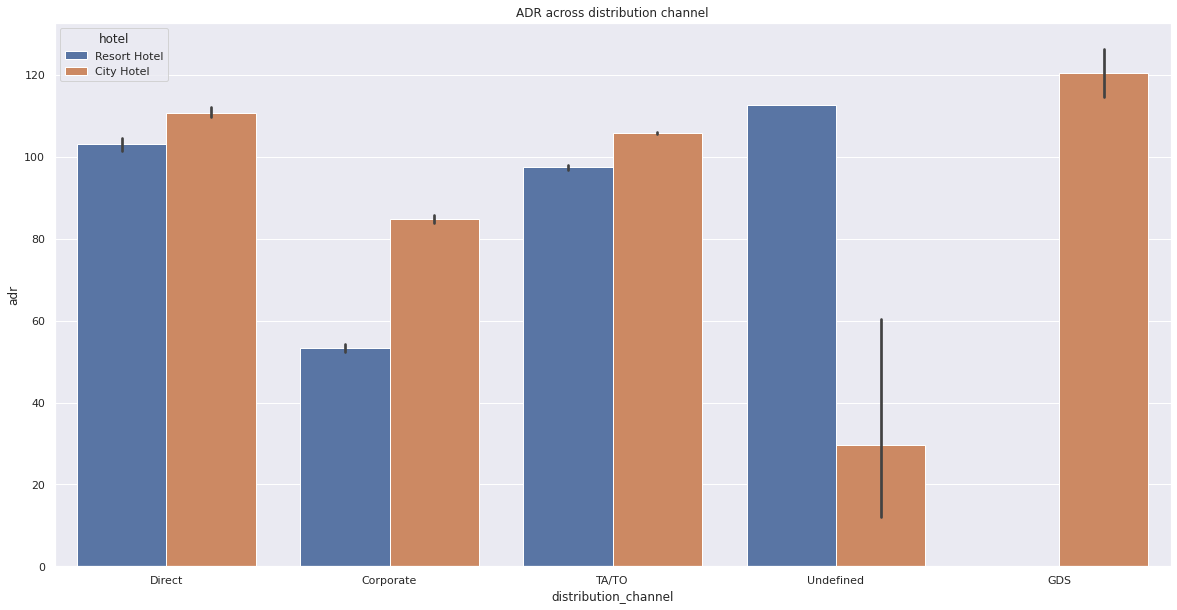

In [62]:
#set plot size and plot barchart
plt.figure(figsize=(20,10))
sns.barplot(x='distribution_channel',y='adr',data=HotelBooking_df,hue='hotel')
plt.title('ADR across distribution channel')

# Observation

In resort hotel undefined contribute more to adr and in city hotel GDS contribute more to adr.
  



# **Problem 10**

The optimal length of stay in order to get the best daily rate?

In [63]:
adr_vs_stay=HotelBooking_df.groupby(['total_stay','adr','hotel']).agg('count').reset_index()
adr_vs_stay=adr_vs_stay.iloc[:,:3]
adr_vs_stay=adr_vs_stay.rename(columns={'is_cancelled':'Number of stays'})
adr_vs_stay=adr_vs_stay[:18000]
adr_vs_stay


,total_stay,adr,hotel
0,0,0.00,City Hotel
1,0,0.00,Resort Hotel
2,1,0.00,City Hotel
3,1,0.00,Resort Hotel
4,1,1.00,City Hotel
...,...,...,...
17995,7,210.86,Resort Hotel
17996,7,211.00,Resort Hotel
17997,7,211.03,Resort Hotel
17998,7,211.16,Resort Hotel


Text(0.5, 1.0, 'Relation between adr and total stay ')

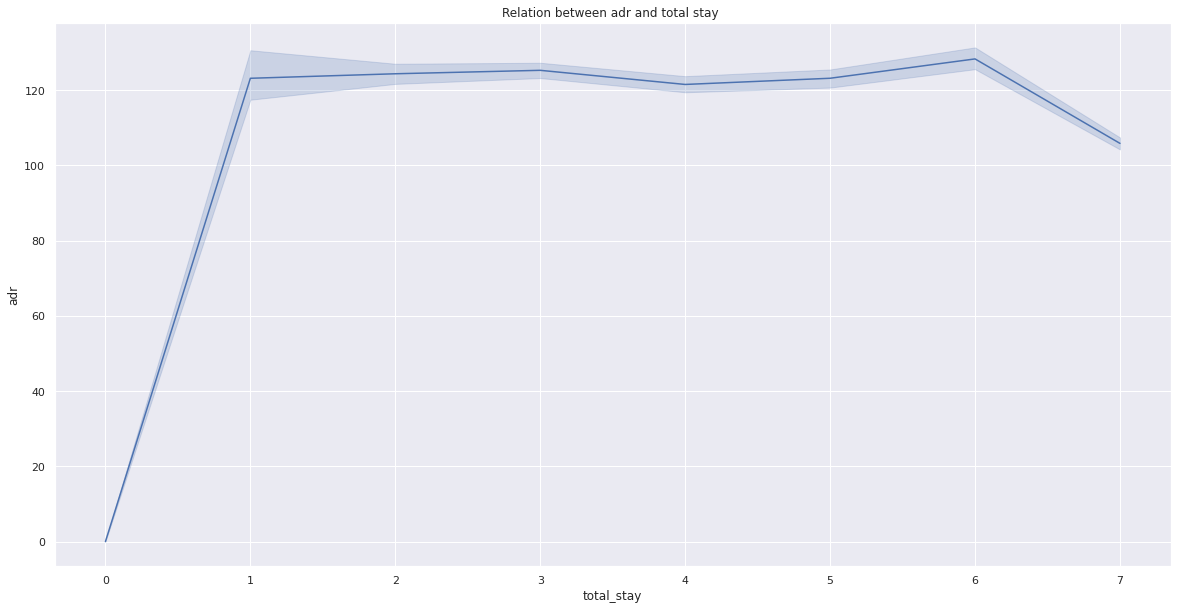

In [64]:
plt.figure(figsize=(20,10))
sns.lineplot(x='total_stay',y='adr',data=adr_vs_stay)
plt.title('Relation between adr and total stay ')

# Observation

If the people stay less than 5 days, they are getting the best price, So optimal stay would be<5 days.

# **Problem 11**

Which agent did the most booking?

In [65]:
##return highest booking made by agents
highest_bookings=HotelBooking_df.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count':"Most_Bookings"}).sort_values(by='Most_Bookings',ascending=False)
highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True)
top_booking=highest_bookings[:10]

Text(0.5, 1.0, 'Highest Bookings made By the agent')

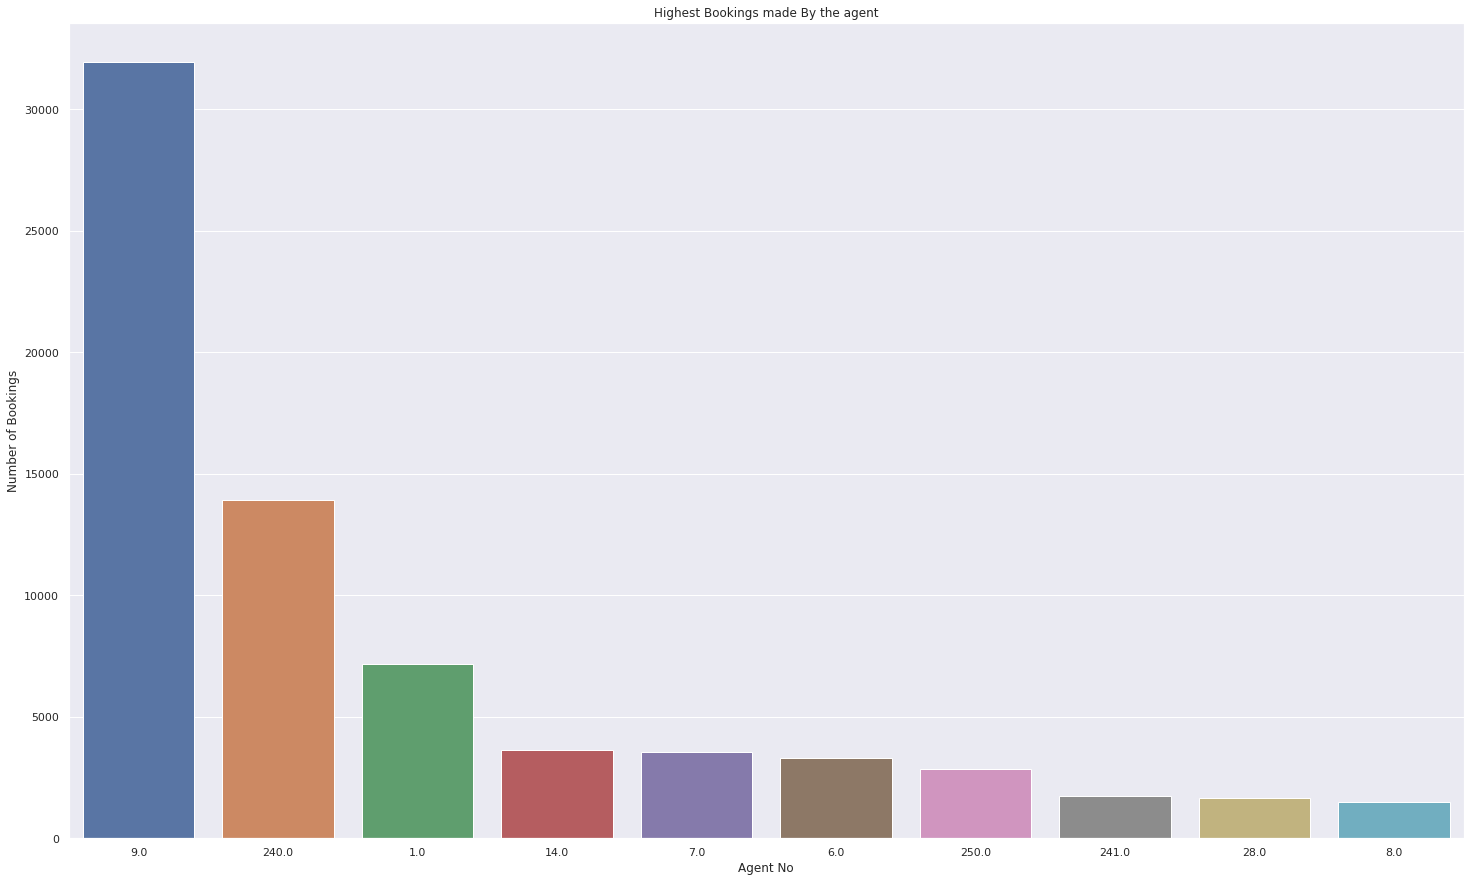

In [66]:
plt.figure(figsize=(25,15))
sns.barplot(x=top_booking['agent'],y=top_booking['Most_Bookings'],order=top_booking['agent'])
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title('Highest Bookings made By the agent')

# Observation

Higest boookings made by the agents are more than 30000.